In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import mahotas as mh
from mahotas.features import surf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.cluster import MiniBatchKMeans
import glob

In [5]:
original_img = np.array(mh.imread("tree.png"),dtype=np.float64)/255

original_img

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       ...,

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1.

In [12]:
original_dim = tuple(original_img.shape)

In [13]:
width, height, depth = tuple(original_img.shape)

In [14]:
image_flattened = np.reshape(original_img, (width * height, depth))

In [16]:
image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [17]:
cluster_assignments = estimator.predict(image_flattened)

(-0.5, 1968.5, 1476.5, -0.5)

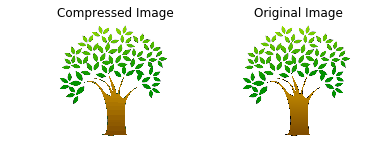

In [19]:
compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.
shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1
plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')

In [27]:
all_instance_filenames = []
all_instance_targets = []
for f in glob.glob('cats-and-dogs-img/*.jpg'):
    target = 1 if 'cat' in f else 0
    all_instance_filenames.append(f)
    all_instance_targets.append(target)
surf_features = []
counter = 0
for f in all_instance_filenames:
    print 'Reading image:', f
    image = mh.imread(f, as_grey=True)
    surf_features.append(surf.surf(image)[:, 5:])
train_len = int(len(all_instance_filenames) * .60)
X_train_surf_features = np.concatenate(surf_features[:train_len])
X_test_surf_feautres = np.concatenate(surf_features[train_len:])
y_train = all_instance_targets[:train_len]
y_test = all_instance_targets[train_len:]
n_clusters = 300
print 'Clustering', len(X_train_surf_features), 'features'
estimator = MiniBatchKMeans(n_clusters=n_clusters)
estimator.fit_transform(X_train_surf_features)

ValueError: need at least one array to concatenate

In [28]:
X_train = []
for instance in surf_features[:train_len]:
    clusters = estimator.predict(instance)
    features = np.bincount(clusters)
    if len(features) < n_clusters:
        features = np.append(features, np.zeros((1, n_clusters-len(features))))
X_train.append(features)
X_test = []
for instance in surf_features[train_len:]:
    clusters = estimator.predict(instance)
    features = np.bincount(clusters)
    if len(features) < n_clusters:
        features = np.append(features, np.zeros((1, n_clusters-len(features))))
X_test.append(features)

NameError: name 'features' is not defined

In [26]:
clf = LogisticRegression(C=0.001, penalty='l2')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print classification_report(y_test, predictions)
print 'Precision: ', precision_score(y_test, predictions)
print 'Recall: ', recall_score(y_test, predictions)
print 'Accuracy: ', accuracy_score(y_test, predictions)

NameError: name 'y_train' is not defined

In [ ]:
clf